### Zopper Device Insurance Attach Analysis :- Month and Branch Store Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/zopper_attach_processed.csv")

df.head()

,Branch,Store_Name,Month,Attach_Percentage
0,Delhi_Ncr,Delhi(Janakpuri) Br,Aug,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,Aug,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,Aug,0.43
3,Pune,Pune(Bhosari) Br,Aug,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,Aug,0.17


**Month Wise Attach % Analysis**

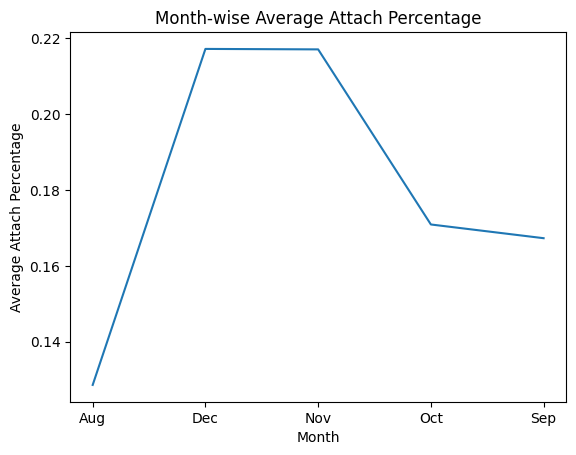

In [6]:
month_avg = (
    df
    .groupby("Month")["Attach_Percentage"]
    .mean()
    .reset_index()
)

month_avg
plt.figure()
plt.plot(month_avg["Month"], month_avg["Attach_Percentage"])
plt.xlabel("Month")
plt.ylabel("Average Attach Percentage")
plt.title("Month-wise Average Attach Percentage")
plt.show()

Attach rates rise from August to November–December, indicating stronger insurance adoption toward the year end.

**Branch Wise Performance Analysis**

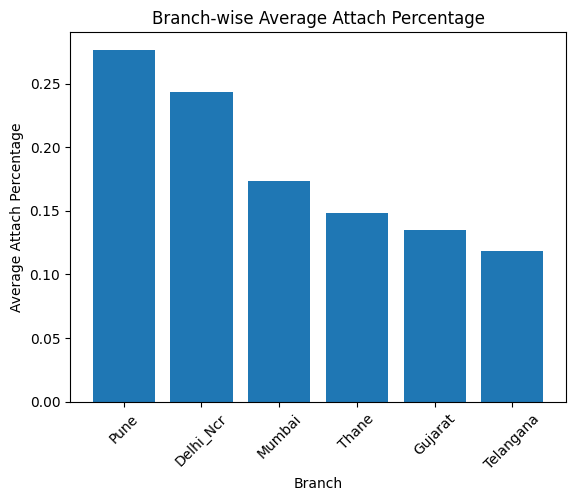

In [7]:
branch_avg = (
    df
    .groupby("Branch")["Attach_Percentage"]
    .mean()
    .reset_index()
    .sort_values(by="Attach_Percentage", ascending=False)
)

branch_avg
plt.figure()
plt.bar(branch_avg["Branch"], branch_avg["Attach_Percentage"])
plt.xlabel("Branch")
plt.ylabel("Average Attach Percentage")
plt.title("Branch-wise Average Attach Percentage")
plt.xticks(rotation=45)
plt.show()



Pune and Delhi NCR lead average attach performance, while Telangana and Gujarat show relatively lower adoption.

**Store Level Performance**

In [8]:
store_stats = (
    df
    .groupby(["Branch", "Store_Name"])["Attach_Percentage"]
    .agg(
        Avg_Attach="mean",
        Std_Dev="std"
    )
    .reset_index()
)
top_10 = store_stats.sort_values("Avg_Attach", ascending=False).head(10)
bottom_10 = store_stats.sort_values("Avg_Attach").head(10)

top_10, bottom_10


(        Branch            Store_Name  Avg_Attach   Std_Dev
 9    Delhi_Ncr      Delhi(Hauz Khas)       0.622  0.107796
 92        Pune        Pune(Hadapsar)       0.586  0.149432
 94        Pune        Pune(Kondhawa)       0.414  0.131263
 3    Delhi_Ncr     Delhi(Budh Vihar)       0.390  0.112472
 5    Delhi_Ncr      Delhi(Daryaganj)       0.386  0.083845
 90        Pune     Pune(Dange Chowk)       0.368  0.340176
 145      Thane           Bhiwandi Br       0.362  0.096281
 18   Delhi_Ncr         Delhi(Narela)       0.358  0.270684
 35   Delhi_Ncr  Haryana(Mewla M.) Br       0.352  0.134052
 41   Delhi_Ncr  Up(Greater Noida) Br       0.350  0.075166,
         Branch                        Store_Name  Avg_Attach   Std_Dev
 106  Telangana                    Ap(Rajamundry)       0.000  0.000000
 107  Telangana  Ap(Tirupathi-Leela Mahal Circle)       0.000  0.000000
 80      Mumbai                    MAHIM(VS Next)       0.000  0.000000
 104  Telangana                    Ap(Ntr Circle)  

A small set of stores consistently achieves high attach rates, demonstrating strong execution and sales effectiveness.

Several stores record near-zero attach rates across months, highlighting clear operational or execution gaps.

In [9]:
# Saving the outputs
top_10.to_csv("../outputs/top_10_stores.csv", index=False)
bottom_10.to_csv("../outputs/bottom_10_stores.csv", index=False)
